<a href="https://colab.research.google.com/github/alexcarvajal/ModeloPrediccionBRT/blob/main/Algoritmos_Modelo_Inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de los *Datasets*

In [7]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt

import os, psutil
url1 = '/content/drive/MyDrive/Reuniones/DatasetsWP2/Dataset1Codificado.csv'
data1 = pd.read_csv(url1)
#data1 = data1[data1['Inputs'] != 0]
data1
url2 = '/content/drive/MyDrive/Reuniones/DatasetsWP2/Dataset2Codificado.csv'
data2 = pd.read_csv(url2)
#data2
process = psutil.Process()
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")



Memory usage: 619.140625 megabytes


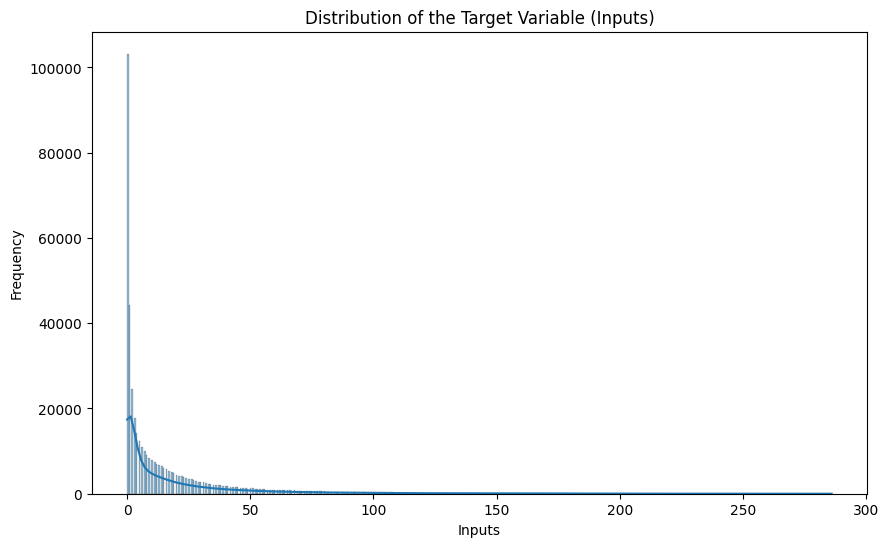

Inputs                                     1.000000
Station_(06000)Portal Eldorado             0.104424
Station_(05100)Banderas P. Central         0.055928
Station_(04000)Cabecera Calle 80           0.019888
Station_(02000)Cabecera Autopista Norte    0.011601
Station_(05000)Portal Américas             0.010185
Day                                        0.004931
Minute                                    -0.002919
Unnamed: 0                                -0.012614
Station_(07000)Portal Sur                 -0.014953
Station_(03000)Portal Suba                -0.020246
Station_(09000)Cabecera Usme              -0.025396
Station_(10000)Portal 20 de Julio         -0.028097
Station_(08000)Portal Tunal               -0.078448
Day_Number_Week                           -0.081278
Holidays                                  -0.108867
Outputs                                   -0.134130
Hour                                      -0.349475
Month                                           NaN
Name: Inputs

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la distribución de la variable objetivo 'Inputs'
plt.figure(figsize=(10, 6))
sns.histplot(data1['Inputs'], kde=True)
plt.title('Distribution of the Target Variable (Inputs)')
plt.xlabel('Inputs')
plt.ylabel('Frequency')
plt.show()

# Calculando las correlaciones entre las características y la variable objetivo
correlation_matrix = data1.corr()
correlations_with_target = correlation_matrix['Inputs'].sort_values(ascending=False)

# Mostrando las correlaciones
correlations_with_target

# **Modelo Inicial Dataset 1**


## Random Forest *Dataset 1*
70% Entrenamiento - 30% Prueba

In [26]:


# Mostrando las primeras filas con las columnas codificadas
data1
# Definiendo las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Inputs'])
y = data1['Inputs']

# Dividiendo los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando las dimensiones de los conjuntos resultantes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Creando una instancia del modelo Random Forest Regressor con valores predeterminados
rf_model = RandomForestRegressor(random_state=42)

# Entrenando el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)
# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")


#cantidad = len(y_pred)
#print("Length of the array:", cantidad)
#y_pred
#print(data1.loc[132195:])
#datospred = y_pred[:5]
#datospred

RMSE: 20.29726588389832
MSE: 411.9790023616626
R^2: 0.5597354269531967
R^2 ajustado: 0.5596754708165694
MAPE: 7275429182119973.0
MAE: 11.282201898710236
Memory usage: 3804.9609375 megabytes


RMSE: 20.29726588389832
MSE: 411.9790023616626
R^2: 0.5597354269531967
R^2 ajustado: 0.5596754708165694
MAPE: 7275429182119973.0

## Random Forest *Dataset 1*
80% Entrenamiento - 20% Prueba

In [27]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#data = data.drop(columns =['Unnamed: 0'])
# Mostrando las primeras filas con las columnas codificadas
data1.head()

# Definiendo las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Inputs'])
y = data1['Inputs']

# Dividiendo los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando las dimensiones de los conjuntos resultantes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Creando una instancia del modelo Random Forest Regressor con valores predeterminados
rf_model = RandomForestRegressor(random_state=42)

# Entrenando el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")


#cantidad = len(y_pred)
#print("Length of the array:", cantidad)
#y_pred


RMSE: 20.0028644250821
MSE: 400.11458520821515
R^2: 0.5769697876362336
R^2 ajustado: 0.5768833677360787
MAPE: 7221343401777170.0
MAE: 11.071551117667083
Memory usage: 4102.64453125 megabytes



## LSTM *Dataset 1*
80% Entrenamiento - 20% Prueba

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

#data = data.drop(columns =['Unnamed: 0'])
# Mostrando las primeras filas con las columnas codificadas
data1

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data1)
X = scaled_data[:, data1.columns != 'Inputs']
y = scaled_data[:, data1.columns == 'Inputs']

# Función para reestructurar los datos para el LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_lstm, y_lstm = create_dataset(X, y, time_steps)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Creación del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Hacer predicciones
y_pred = model.predict(X_test)

# Preparar datos para revertir la normalización
# Crear un array vacío con la forma de los datos originales
test_data_shape = (y_test.shape[0], scaled_data.shape[1])

# Rellenar el array con ceros (o puedes usar otro valor neutral)
test_data_filled = np.zeros(test_data_shape)

# Colocar los valores de y_test y y_pred en la columna correspondiente a 'Inputs'
# Asegúrate de usar el índice correcto para la columna 'Inputs'
input_column_index = list(data1.columns).index('Inputs')
test_data_filled[:, input_column_index] = np.reshape(y_test, (y_test.shape[0],))
y_test_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

test_data_filled[:, input_column_index] = np.reshape(y_pred, (y_pred.shape[0],))
y_pred_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")


#y_pred_original
#cantidad = len(y_pred_original)
#print("Length of the array:", cantidad)


Epoch 1/10
5509/5509 [==============================] - 51s 9ms/step - loss: 0.0075
Epoch 2/10
5509/5509 [==============================] - 48s 9ms/step - loss: 0.0055
Epoch 3/10
5509/5509 [==============================] - 46s 8ms/step - loss: 0.0051
Epoch 4/10
5509/5509 [==============================] - 44s 8ms/step - loss: 0.0048
Epoch 5/10
5509/5509 [==============================] - 48s 9ms/step - loss: 0.0046
Epoch 6/10
5509/5509 [==============================] - 46s 8ms/step - loss: 0.0044
Epoch 7/10
5509/5509 [==============================] - 48s 9ms/step - loss: 0.0042
Epoch 8/10
5509/5509 [==============================] - 47s 8ms/step - loss: 0.0041
Epoch 9/10
5509/5509 [==============================] - 46s 8ms/step - loss: 0.0040
Epoch 10/10
2755/2755 [==============================] - 10s 3ms/step
RMSE: 0.06338107060368868
MSE: 0.00401716011086977
R^2: 0.6552857651453886
R^2 ajustado: 0.6552740301927127
MAPE: 19853477789901.15
MAE: 0.03556014608995485
Memory usage: 449

## LSTM Dataset 1
70% Entrenamiento - 30% Prueba

In [31]:
data1.head()

# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data1)
X = scaled_data[:, data1.columns != 'Inputs']
y = scaled_data[:, data1.columns == 'Inputs']

# Función para reestructurar los datos para el LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_lstm, y_lstm = create_dataset(X, y, time_steps)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.3, random_state=42)

# Creación del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Hacer predicciones
y_pred = model.predict(X_test)

# Preparar datos para revertir la normalización
# Crear un array vacío con la forma de los datos originales
test_data_shape = (y_test.shape[0], scaled_data.shape[1])

# Rellenar el array con ceros (o puedes usar otro valor neutral)
test_data_filled = np.zeros(test_data_shape)

# Colocar los valores de y_test y y_pred en la columna correspondiente a 'Inputs'
# Asegúrate de usar el índice correcto para la columna 'Inputs'
input_column_index = list(data1.columns).index('Inputs')
test_data_filled[:, input_column_index] = np.reshape(y_test, (y_test.shape[0],))
y_test_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

test_data_filled[:, input_column_index] = np.reshape(y_pred, (y_pred.shape[0],))
y_pred_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

Epoch 1/10
4820/4820 [==============================] - 47s 9ms/step - loss: 0.0077
Epoch 2/10
4820/4820 [==============================] - 39s 8ms/step - loss: 0.0056
Epoch 3/10
4820/4820 [==============================] - 39s 8ms/step - loss: 0.0052
Epoch 4/10
4820/4820 [==============================] - 39s 8ms/step - loss: 0.0049
Epoch 5/10
4820/4820 [==============================] - 39s 8ms/step - loss: 0.0047
Epoch 6/10
4820/4820 [==============================] - 40s 8ms/step - loss: 0.0045
Epoch 7/10
4820/4820 [==============================] - 40s 8ms/step - loss: 0.0044
Epoch 8/10
4820/4820 [==============================] - 40s 8ms/step - loss: 0.0042
Epoch 9/10
4820/4820 [==============================] - 40s 8ms/step - loss: 0.0041
Epoch 10/10
4132/4132 [==============================] - 15s 3ms/step
RMSE: 0.0633748228902447
MSE: 0.004016368176369883
R^2: 0.6505136006485686
R^2 ajustado: 0.6505056691923461
MAPE: 25340137410515.33
MAE: 0.03749543544846918
Memory usage: 462

## SVM Dataset 1
80% Entrenamiento - 20% prueba

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#data = data.drop(columns =['Unnamed: 0'])
# Mostrando las primeras filas con las columnas codificadas
data1.head()

# Definiendo las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Inputs','Outputs'])
y = data1['Inputs']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM
model = SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## SVM Dataset 1

80% Entrenamiento - 20% Prueba


In [ ]:

#data = data.drop(columns =['Unnamed: 0'])
# Mostrando las primeras filas con las columnas codificadas
data1.head()

# Definiendo las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Inputs','Outputs'])
y = data1['Inputs']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM
model = SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

KeyError: "['Unnamed: 0'] not found in axis"

## XGBoost Dataset 1
80% Entrenamiento - 20% Entrenamiento


In [32]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder


#data = data.drop(columns =['Unnamed: 0'])
# Mostrando las primeras filas con las columnas codificadas

# Mostrando las primeras filas con las columnas codificadas
data1.head()
# Definiendo las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Inputs'])
y = data1['Inputs']
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#Creacion del modelo de XGBoost
#modelo = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
#Ajuste de parámetros como 'max_depth', 'learning_rate', 'n_estimators' y 'gamma'.

modelo = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=50, gamma=0.5)


#Entrena el modelo usando los datos de entrenamiento.
modelo.fit(X_train, y_train)

#Predicciones usando el conjunto de prueba.
y_pred = modelo.predict(X_test)


# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

RMSE: 20.665969109415176
MSE: 427.0822792313023
R^2: 0.478726350867251
R^2 ajustado: 0.47861986103414966
MAPE: 9207734106476824.0
MAE: 12.754790233466323
Memory usage: 4449.2265625 megabytes


## XGBoost Dataset 1
70% Entrenamiento - 30% Entrenamiento

In [35]:

# Mostrando las primeras filas con las columnas codificadas
data1.head()
# Definiendo las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Inputs'])
y = data1['Inputs']
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
#Creacion del modelo de XGBoost
#modelo = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
#Ajuste de parámetros como 'max_depth', 'learning_rate', 'n_estimators' y 'gamma'.

modelo = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=50, gamma=0.5)


#Entrena el modelo usando los datos de entrenamiento.
modelo.fit(X_train, y_train)

#Predicciones usando el conjunto de prueba.
y_pred = modelo.predict(X_test)



# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

RMSE: 22.214716423022814
MSE: 493.49362575531956
R^2: 0.5081429597693823
R^2 ajustado: 0.5080759776642788
MAPE: 8316324986893448.0
MAE: 13.138874013475768
Memory usage: 4469.140625 megabytes


# **Modelo Inicial Dataset 2**

## Random Forest Dataset 2

70% Entrenamiento - 30% Prueba

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#data = data.drop(columns =['Unnamed: 0'])
# Mostrando las primeras filas con las columnas codificadas
data2.head()

# Definiendo las características (X) y la variable objetivo (y)
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']

# Dividiendo los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando las dimensiones de los conjuntos resultantes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Creando una instancia del modelo Random Forest Regressor con valores predeterminados
rf_model = RandomForestRegressor(random_state=42)

# Entrenando el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

RMSE: 26.34940733116482
MSE: 694.2912667036422
R^2: 0.45168107857844386
R^2 ajustado: 0.4515930014077355
MAPE: 3.01420428724232
MAE: 17.001490096896138
Memory usage: 4471.19921875 megabytes


## Random Forest Dataset 2

80% Entrenamiento - 20% Prueba

In [37]:
#data = data.drop(columns =['Unnamed: 0'])
# Mostrando las primeras filas con las columnas codificadas
data2.head()

# Definiendo las características (X) y la variable objetivo (y)
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']

# Dividiendo los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando las dimensiones de los conjuntos resultantes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Creando una instancia del modelo Random Forest Regressor con valores predeterminados
rf_model = RandomForestRegressor(random_state=42)

# Entrenando el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

RMSE: 26.18353165244235
MSE: 685.5773297944504
R^2: 0.4571624761565124
R^2 ajustado: 0.45703166996392675
MAPE: 3.007315173769221
MAE: 16.915634826705986
Memory usage: 4471.19921875 megabytes


## LSTM Dataset 2
70% Entrenamiento - 30% Prueba

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data2)
X = scaled_data[:, data2.columns != 'Inputs']
y = scaled_data[:, data2.columns == 'Inputs']

# Función para reestructurar los datos para el LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_lstm, y_lstm = create_dataset(X, y, time_steps)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.3, random_state=42)

# Creación del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# Hacer predicciones
y_pred = model.predict(X_test)

# Preparar datos para revertir la normalización
# Crear un array vacío con la forma de los datos originales
test_data_shape = (y_test.shape[0], scaled_data.shape[1])

# Rellenar el array con ceros (o puedes usar otro valor neutral)
test_data_filled = np.zeros(test_data_shape)

# Colocar los valores de y_test y y_pred en la columna correspondiente a 'Inputs'
# Asegúrate de usar el índice correcto para la columna 'Inputs'
input_column_index = list(data2.columns).index('Inputs')
test_data_filled[:, input_column_index] = np.reshape(y_test, (y_test.shape[0],))
y_test_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

test_data_filled[:, input_column_index] = np.reshape(y_pred, (y_pred.shape[0],))
y_pred_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

Epoch 1/20
3633/3633 [==============================] - 60s 13ms/step - loss: 0.0085
Epoch 2/20
3633/3633 [==============================] - 31s 9ms/step - loss: 0.0065
Epoch 3/20
3633/3633 [==============================] - 31s 8ms/step - loss: 0.0062
Epoch 4/20
3633/3633 [==============================] - 32s 9ms/step - loss: 0.0060
Epoch 5/20
3633/3633 [==============================] - 38s 10ms/step - loss: 0.0059
Epoch 6/20
3633/3633 [==============================] - 29s 8ms/step - loss: 0.0058
Epoch 7/20
3633/3633 [==============================] - 29s 8ms/step - loss: 0.0058
Epoch 8/20
3633/3633 [==============================] - 31s 8ms/step - loss: 0.0058
Epoch 9/20
3633/3633 [==============================] - 29s 8ms/step - loss: 0.0058
Epoch 10/20
3633/3633 [==============================] - 29s 8ms/step - loss: 0.0057
Epoch 11/20
3633/3633 [==============================] - 29s 8ms/step - loss: 0.0057
Epoch 12/20
3633/3633 [==============================] - 29s 8ms/step - 

## LSTM Dataset 2
80% Entrenamiento - 20% Prueba

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data2)
X = scaled_data[:, data2.columns != 'Inputs']
y = scaled_data[:, data2.columns == 'Inputs']

# Función para reestructurar los datos para el LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_lstm, y_lstm = create_dataset(X, y, time_steps)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Creación del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# Hacer predicciones
y_pred = model.predict(X_test)

# Preparar datos para revertir la normalización
# Crear un array vacío con la forma de los datos originales
test_data_shape = (y_test.shape[0], scaled_data.shape[1])

# Rellenar el array con ceros (o puedes usar otro valor neutral)
test_data_filled = np.zeros(test_data_shape)

# Colocar los valores de y_test y y_pred en la columna correspondiente a 'Inputs'
# Asegúrate de usar el índice correcto para la columna 'Inputs'
input_column_index = list(data2.columns).index('Inputs')
test_data_filled[:, input_column_index] = np.reshape(y_test, (y_test.shape[0],))
y_test_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

test_data_filled[:, input_column_index] = np.reshape(y_pred, (y_pred.shape[0],))
y_pred_original = scaler.inverse_transform(test_data_filled)[:, input_column_index]

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

Epoch 1/20
4151/4151 [==============================] - 38s 8ms/step - loss: 0.0084
Epoch 2/20
4151/4151 [==============================] - 33s 8ms/step - loss: 0.0065
Epoch 3/20
4151/4151 [==============================] - 35s 8ms/step - loss: 0.0061
Epoch 4/20
4151/4151 [==============================] - 33s 8ms/step - loss: 0.0059
Epoch 5/20
4151/4151 [==============================] - 34s 8ms/step - loss: 0.0059
Epoch 6/20
4151/4151 [==============================] - 33s 8ms/step - loss: 0.0058
Epoch 7/20
4151/4151 [==============================] - 33s 8ms/step - loss: 0.0058
Epoch 8/20
4151/4151 [==============================] - 35s 8ms/step - loss: 0.0057
Epoch 9/20
4151/4151 [==============================] - 33s 8ms/step - loss: 0.0057
Epoch 10/20
4151/4151 [==============================] - 35s 8ms/step - loss: 0.0057
Epoch 11/20
4151/4151 [==============================] - 35s 8ms/step - loss: 0.0057
Epoch 12/20
4151/4151 [==============================] - 36s 9ms/step - lo

## SVM Dataset 2
70% Entrenamiento - 30% Prueba


In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix



data2 = data2.drop(columns =['Unnamed: 0'])


# Definiendo las características (X) y la variable objetivo (y)
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM
model = SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## SVM Dataset 2
80% Entrenamiento - 20% Prueba


In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix



data2 = data2.drop(columns =['Unnamed: 0'])


# Definiendo las características (X) y la variable objetivo (y)
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM
model = SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## XGBoost Dataset 2
70% Entrenamiento - 30% Prueba


In [12]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error


# Mostrando las primeras filas con las columnas codificadas
data2.head()
# Definiendo las características (X) y la variable objetivo (y)
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
#Creacion del modelo de XGBoost
#modelo = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
#Ajuste de parámetros como 'max_depth', 'learning_rate', 'n_estimators' y 'gamma'.

modelo = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=50, gamma=0.5)


#Entrena el modelo usando los datos de entrenamiento.
modelo.fit(X_train, y_train)

#Predicciones usando el conjunto de prueba.
y_pred = modelo.predict(X_test)

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

RMSE: 26.772904644068976
MSE: 716.7884230804101
R^2: 0.4579315188548997
R^2 ajustado: 0.4578444457004194
MAPE: 2.887705174875219
MAE: 16.959446479874146
Memory usage: 630.234375 megabytes


## XGBoost Dataset 2
80% Entrenamiento - 20% Prueba


In [11]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error


# Mostrando las primeras filas con las columnas codificadas
data2.head()
# Definiendo las características (X) y la variable objetivo (y)
X = data2.drop(columns=['Inputs'])
y = data2['Inputs']
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#Creacion del modelo de XGBoost
#modelo = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
#Ajuste de parámetros como 'max_depth', 'learning_rate', 'n_estimators' y 'gamma'.

modelo = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10, learning_rate=0.1, n_estimators=50, gamma=0.5)


#Entrena el modelo usando los datos de entrenamiento.
modelo.fit(X_train, y_train)

#Predicciones usando el conjunto de prueba.
y_pred = modelo.predict(X_test)

# Calcular y mostrar las métricas: MSE, R^2, MAPE y R^2 ajustado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse) # Aquí es donde cambiamos MSE por RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
r2_adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'R^2 ajustado: {r2_adjusted}')
print(f'MAPE: {mape}')
print(f'MAE: {mae}')
# Get the current process
process = psutil.Process()
# Print the memory usage in megabytes
print(f"Memory usage: {process.memory_info().rss / (1024 * 1024)} megabytes")

RMSE: 24.1901943870127
MSE: 585.1655044814607
R^2: 0.48857636450409947
R^2 ajustado: 0.4884531280371658
MAPE: 2.9278648113970105
MAE: 15.73180118855605
Memory usage: 629.9765625 megabytes
